In [15]:
import os
print(os.listdir())

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import tensorflow,keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model, load_model

In [3]:
# loading tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [4]:
# loading model
model = load_model('model_image_to_text.h5', compile=False)
print(model.summary())

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 895)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 895, 256)     229120      ['input_11[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 895, 256)     0           ['embedding_2[0][0]']            
                                                                                                  
 input_10 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                            

In [5]:
def FeatureExtractor(img):
    model_vgg16 = VGG16()
    model_temp = Model(inputs = model_vgg16.inputs, outputs = model_vgg16.layers[-2].output)
    image = load_img(img, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model_temp.predict(image, verbose=0)
    return feature

In [11]:
def predictText(tokenizer, model):
    tokenizer = tokenizer
    model = model
    maxlen = model.output.shape[1]
    in_text = 'startseq'
    for i in range(maxlen):
        print('tokenized text:-    ',in_text)
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        print('tokenized sequence:-', sequence)
        sequence = pad_sequences([sequence], maxlen = maxlen)
        # print(sequence)
        yhat = model.predict([feature,sequence], verbose = 0)
        yhat = np.argmax(yhat)
        word = ''
        for word_1, index in tokenizer.word_index.items():
            if index == yhat:
                word = word_1
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
        print()
    in_text = in_text.split()
    in_text.pop(0)
    in_text.pop(len(in_text)-1)
    in_text = ' '.join(in_text)
    return in_text

In [7]:
#image
def plotImage(image_filename):
    image_filename = load_img(image_filename, target_size = (224, 224))
    plt.imshow(image_filename)
    plt.axis('off')
    plt.show()

In [8]:
list_of_image = ['44129946_9eeb385d77.jpg', '44856031_0d82c2c7d1.jpg', '47870024_73a4481f7d.jpg', '47871819_db55ac4699.jpg', '49553964_cee950f3ba.jpg']

two people are standing in the of trees


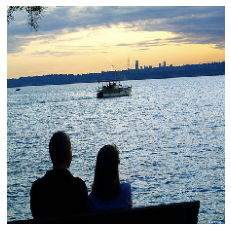


two dogs wearing down and the sand in the grass


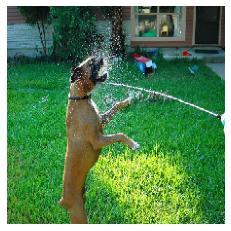


man runs on the shoulders and people with white and dog on up


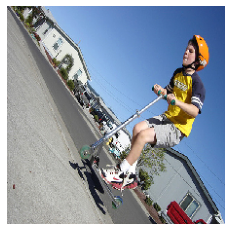


the boy is running on the snow


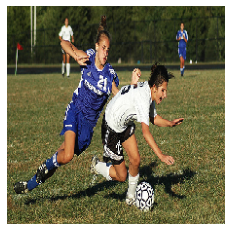


man runs on the of of dog at the of trees


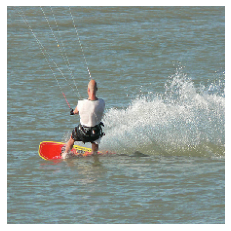

In [10]:
# predicted text
for i in list_of_image:
    feature = FeatureExtractor(i)
    text = predictText(tokenizer, model)
    print(text)
    plotImage(i)
    print()

tokenized text:-     startseq
tokenized sequence:- [1]

tokenized text:-     startseq two
tokenized sequence:- [1, 12]

tokenized text:-     startseq two people
tokenized sequence:- [1, 12, 16]

tokenized text:-     startseq two people are
tokenized sequence:- [1, 12, 16, 27]

tokenized text:-     startseq two people are standing
tokenized sequence:- [1, 12, 16, 27, 24]

tokenized text:-     startseq two people are standing in
tokenized sequence:- [1, 12, 16, 27, 24, 3]

tokenized text:-     startseq two people are standing in the
tokenized sequence:- [1, 12, 16, 27, 24, 3, 4]

tokenized text:-     startseq two people are standing in the of
tokenized sequence:- [1, 12, 16, 27, 24, 3, 4, 9]

tokenized text:-     startseq two people are standing in the of trees
tokenized sequence:- [1, 12, 16, 27, 24, 3, 4, 9, 90]

Resulting Predicted text:-  two people are standing in the of trees
Image:- 


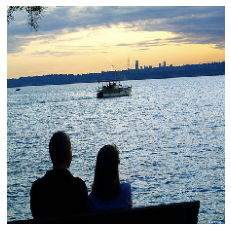

In [12]:
i = '44129946_9eeb385d77.jpg'
feature = FeatureExtractor(i)
text = predictText(tokenizer, model)
print()
print('Resulting Predicted text:- ',text)
print('Image:- ')
plotImage(i)

tokenized text:-     startseq
tokenized sequence:- [1]

tokenized text:-     startseq two
tokenized sequence:- [1, 12]

tokenized text:-     startseq two dogs
tokenized sequence:- [1, 12, 36]

tokenized text:-     startseq two dogs wearing
tokenized sequence:- [1, 12, 36, 20]

tokenized text:-     startseq two dogs wearing down
tokenized sequence:- [1, 12, 36, 20, 51]

tokenized text:-     startseq two dogs wearing down and
tokenized sequence:- [1, 12, 36, 20, 51, 6]

tokenized text:-     startseq two dogs wearing down and the
tokenized sequence:- [1, 12, 36, 20, 51, 6, 4]

tokenized text:-     startseq two dogs wearing down and the sand
tokenized sequence:- [1, 12, 36, 20, 51, 6, 4, 94]

tokenized text:-     startseq two dogs wearing down and the sand in
tokenized sequence:- [1, 12, 36, 20, 51, 6, 4, 94, 3]

tokenized text:-     startseq two dogs wearing down and the sand in the
tokenized sequence:- [1, 12, 36, 20, 51, 6, 4, 94, 3, 4]

tokenized text:-     startseq two dogs wearing do

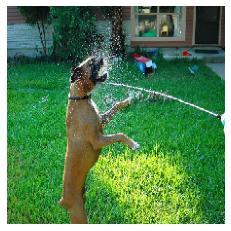

In [13]:
i = '44856031_0d82c2c7d1.jpg'
feature = FeatureExtractor(i)
text = predictText(tokenizer, model)
print()
print('Resulting Predicted text:- ',text)
print('Image:- ')
plotImage(i)

tokenized text:-     startseq
tokenized sequence:- [1]

tokenized text:-     startseq man
tokenized sequence:- [1, 11]

tokenized text:-     startseq man runs
tokenized sequence:- [1, 11, 137]

tokenized text:-     startseq man runs on
tokenized sequence:- [1, 11, 137, 5]

tokenized text:-     startseq man runs on the
tokenized sequence:- [1, 11, 137, 5, 4]

tokenized text:-     startseq man runs on the shoulders
tokenized sequence:- [1, 11, 137, 5, 4, 419]

tokenized text:-     startseq man runs on the shoulders and
tokenized sequence:- [1, 11, 137, 5, 4, 419, 6]

tokenized text:-     startseq man runs on the shoulders and people
tokenized sequence:- [1, 11, 137, 5, 4, 419, 6, 16]

tokenized text:-     startseq man runs on the shoulders and people with
tokenized sequence:- [1, 11, 137, 5, 4, 419, 6, 16, 7]

tokenized text:-     startseq man runs on the shoulders and people with white
tokenized sequence:- [1, 11, 137, 5, 4, 419, 6, 16, 7, 17]

tokenized text:-     startseq man runs on 

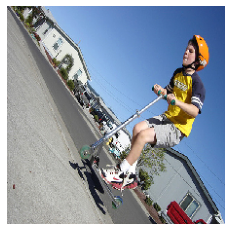

In [14]:
i = '47870024_73a4481f7d.jpg'
feature = FeatureExtractor(i)
text = predictText(tokenizer, model)
print()
print('Resulting Predicted text:- ',text)
print('Image:- ')
plotImage(i)